<H1>AFRICA HEALTHCARE DATASET ANALYSIS</H1>

In [1]:
#import python libraries Pandas and Matplotlib
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#importing dataset in excel
health_dataset=pd.read_excel("africa_healthcare_dataset.xlsx")

#display dataset columns and values
from IPython.display import display
display(health_dataset)

#display columns and datatypes
health_dataset.info()

,Patient_ID,Country,Region,Gender,Age,Visit_Date,Diagnosis,Treatment_Cost_USD,Hospital_Type,Length_of_Stay_Days,Outcome,Insurance_Type,Income_Level,Medication_Compliance,Readmission_within_30days
0,P200000,Uganda,East Africa,Female,6.0,2023-01-31,Malaria,3166.77,NGO,19,Under Treatment,Government,High,Excellent,0
1,P200001,Morocco,North Africa,Male,73.0,2023-12-30,Typhoid,3986.03,Private,10,Under Treatment,Private,Low,Non-Adherent,0
2,P200002,Ethiopia,East Africa,Male,NaN,2022-05-10,Covid-19,2691.51,NGO,27,Recovered,Government,Middle,Poor,0
3,P200003,Kenya,East Africa,Male,77.0,2023-07-18,Malaria,0,Public,28,Recovered,Private,Low,Good,1
4,P200004,Egypt,North Africa,Male,49.0,2023-02-04,Tuberculosis,0,Teaching,7,Recovered,Government,Low,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,P219995,Ghana,West Africa,Female,37.0,2023-11-02,Typhoid,1228.32,Private,18,Recovered,Government,Low,Excellent,0
19996,P219996,Kenya,East Africa,Female,85.0,2021-08-24,Covid-19,4538.6,NGO,24,Recovered,Private,Low,Excellent,1
19997,P219997,Uganda,East Africa,Male,8.0,2020-12-08,Hypertension,4099.77,NGO,11,Recovered,Government,Low,Good,0
19998,P219998,Ghana,West Africa,Male,63.0,2024-12-02,Pneumonia,0,Private,7,Recovered,Private,Low,Excellent,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient_ID                 20000 non-null  object        
 1   Country                    20000 non-null  object        
 2   Region                     20000 non-null  object        
 3   Gender                     20000 non-null  object        
 4   Age                        18503 non-null  float64       
 5   Visit_Date                 20000 non-null  datetime64[ns]
 6   Diagnosis                  20000 non-null  object        
 7   Treatment_Cost_USD         20000 non-null  object        
 8   Hospital_Type              20000 non-null  object        
 9   Length_of_Stay_Days        20000 non-null  object        
 10  Outcome                    20000 non-null  object        
 11  Insurance_Type             16552 non-null  object        
 12  Inco

<h2>findings</h2>
dataset has null values present in 'Age' and 'Insurance_Type'

<h2>DATA CLEANING</h2>

In [3]:
#data cleaning
#focus 'Age' column
mean_age=health_dataset['Age'].mean() #create new var and assign it as the mean value of age column
health_dataset['Age']=health_dataset['Age'].fillna(mean_age)

#focus 'Insurance_Type' column
insurance_col_fill='No Insurance'
health_dataset['Insurance_Type']=health_dataset['Insurance_Type'].fillna(insurance_col_fill)

#focus 'Lenght_of_Stay_Days' replacing rows which had 'error' in them to 0
health_dataset['Length_of_Stay_Days'] = health_dataset['Length_of_Stay_Days'].replace('error', 0)

#rename 'Diagnosis' column to 'Disease'
health_dataset=health_dataset.rename(columns={'Diagnosis':'Disease'})

#display column,datatypes, if null values still exist
health_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient_ID                 20000 non-null  object        
 1   Country                    20000 non-null  object        
 2   Region                     20000 non-null  object        
 3   Gender                     20000 non-null  object        
 4   Age                        20000 non-null  float64       
 5   Visit_Date                 20000 non-null  datetime64[ns]
 6   Disease                    20000 non-null  object        
 7   Treatment_Cost_USD         20000 non-null  object        
 8   Hospital_Type              20000 non-null  object        
 9   Length_of_Stay_Days        20000 non-null  int64         
 10  Outcome                    20000 non-null  object        
 11  Insurance_Type             20000 non-null  object        
 12  Inco

C:\Users\user\AppData\Local\Temp\ipykernel_22832\1012480156.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  health_dataset['Length_of_Stay_Days'] = health_dataset['Length_of_Stay_Days'].replace('error', 0)


<H2>EXPLORATORY ANALYSIS</H2>

<h3>What is the region with the highest outbreak?</h3>

Region
East Africa        7510
North Africa       5074
West Africa        4986
Southern Africa    2430
dtype: int64


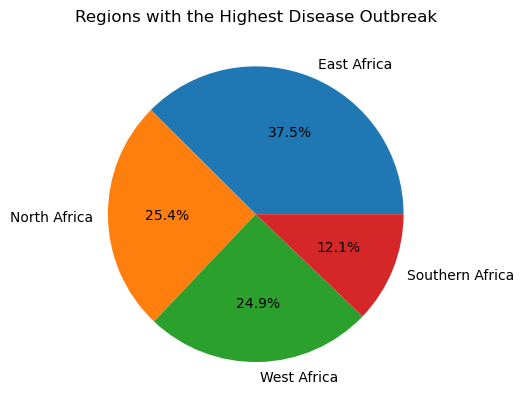

In [4]:
#define var
region_wth_highest_disease_outbreak=health_dataset.groupby('Region').size().sort_values(ascending=False)

#display top 5
print(region_wth_highest_disease_outbreak)

#plot pie chart
plt.figure()
plt.pie(region_wth_highest_disease_outbreak.values, labels=region_wth_highest_disease_outbreak.index, autopct='%1.1f%%')
plt.title('Regions with the Highest Disease Outbreak')
plt.show()

<h3>Findings</h3>
The Eastern region is the region with the most disease outbreaks in Africa,
second to North and Western Region

<h2>Countries with the highest disease outbreak?</h2>

In [5]:
#top countries with the highest disease outbreak and their region
top_country_region_with_disease_outbreak=(health_dataset.groupby(['Country','Region']).size().reset_index(name='Outbreaks')
                                          .sort_values('Outbreaks', ascending=False))

#display
print(top_country_region_with_disease_outbreak)

        Country           Region  Outbreaks
4       Morocco     North Africa       2591
2         Ghana      West Africa       2526
7        Uganda      East Africa       2519
3         Kenya      East Africa       2511
0         Egypt     North Africa       2483
1      Ethiopia      East Africa       2480
5       Nigeria      West Africa       2460
6  South Africa  Southern Africa       2430


<h3>Findings</h3>
Morocco in the Northern region is the country with the highest outbreak, followed by Ghana in the Western region

<h2>Disease with the highest patient count?</h2>

Disease
Malaria         3571
Hypertension    2882
Covid-19        2773
Typhoid         2447
Diabetes        2436
Name: count, dtype: int64


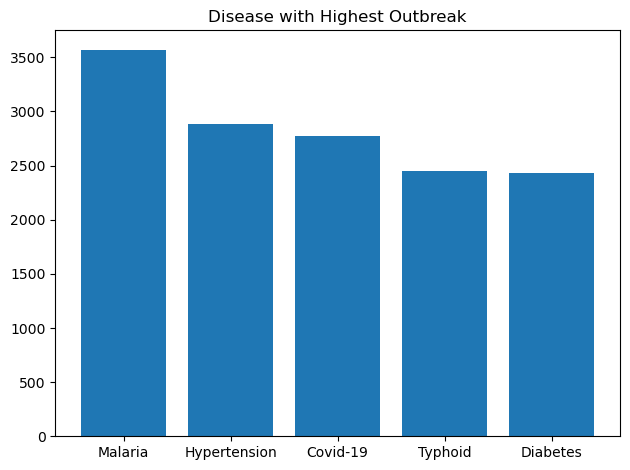

In [6]:
#define var
top_disease_outbreaks=health_dataset['Disease'].value_counts()

#display
print(top_disease_outbreaks.head(5))

#define var for plotting
top_disease_outbreaks=health_dataset.groupby('Disease').size().sort_values(ascending=False).head(5)

#plot bar chart
plt.figure()
plt.bar(top_disease_outbreaks.index, top_disease_outbreaks.values)
plt.title('Disease with Highest Outbreak')
plt.tight_layout()

plt.show()

<h3>Findings</h3>
Malaria is the top diseased outbreak 
followed by hypertension
Covid-19 Typhoid and diabetes

In [7]:
#define var to group age
bins = [0, 18, 35, 50, 65, 100]
labels = ['0–18', '19–35', '36–50', '51–65', '65+']

#create 'Age Group' column in dataset
health_dataset['Age_Group'] = pd.cut(health_dataset['Age'], bins=bins, labels=labels)



In [8]:
# Group by Age_Group and Disease, then count occurrences
age_disease_counts = health_dataset.groupby(["Age_Group", "Disease"]).size().reset_index(name='Count')

# Pivot the table to show diseases as columns and age groups as rows
age_disease_pivot = age_disease_counts.pivot(index='Age_Group', columns='Disease', values='Count').fillna(0)

# Display the result
print(age_disease_pivot)


Disease    Covid-19  Diabetes  HIV/AIDS  Hypertension  Malaria  Pneumonia  \
Age_Group                                                                   
0–18            543       452       331           537      696        334   
19–35           483       462       309           478      634        297   
36–50           612       555       407           695      847        372   
51–65           405       376       282           446      511        265   
65+             718       578       473           715      868        445   

Disease    Tuberculosis  Typhoid  
Age_Group                         
0–18                421      423  
19–35               438      433  
36–50               553      552  
51–65               388      375  
65+                 554      657  


C:\Users\user\AppData\Local\Temp\ipykernel_22832\1031024214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_counts = health_dataset.groupby(["Age_Group", "Disease"]).size().reset_index(name='Count')


<h3>Findings</h3>
65+ age group seems to be the highest admitted patients, second to 36-50 age group and 19-35 age group

<h2>Patient Status After Admission? Answers the question of recovery rate and mortality rate (grouped question) </h2>

Outcome
Recovered          15628
Under Treatment     2203
Referred            1229
Deceased             940
dtype: int64


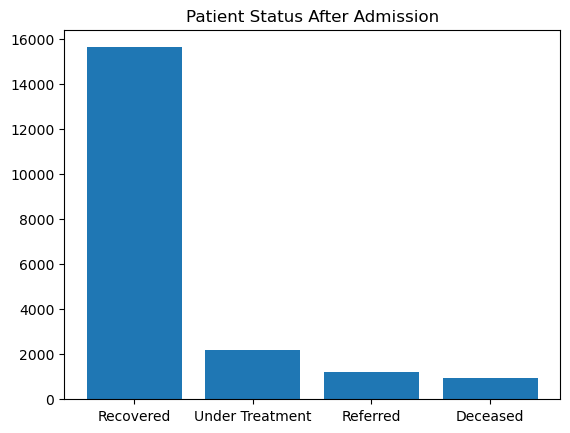

In [9]:
#define var
patient_status_after_admission=health_dataset.groupby('Outcome').size().sort_values(ascending=False)

#display top 5
print(patient_status_after_admission)

#plot bar chart
plt.figure()
plt.bar(patient_status_after_admission.index,patient_status_after_admission.values)
plt.title('Patient Status After Admission')
plt.show()

<h2>Findings-q2</h2>
Even though there is a high breakout of the disease the patients recover 
from this we can note that african patients have a high recovery rate than mortality

<h2>Which region has the highest recovery rate or mortalities?</h2>

In [10]:
#define var
region_patient_status_after_admission=health_dataset.groupby(['Region','Outcome']).size().reset_index(name='Patient Count')

#display
print(region_patient_status_after_admission)


             Region          Outcome  Patient Count
0       East Africa         Deceased            344
1       East Africa        Recovered           5869
2       East Africa         Referred            450
3       East Africa  Under Treatment            847
4      North Africa         Deceased            233
5      North Africa        Recovered           3956
6      North Africa         Referred            313
7      North Africa  Under Treatment            572
8   Southern Africa         Deceased            108
9   Southern Africa        Recovered           1930
10  Southern Africa         Referred            156
11  Southern Africa  Under Treatment            236
12      West Africa         Deceased            255
13      West Africa        Recovered           3873
14      West Africa         Referred            310
15      West Africa  Under Treatment            548


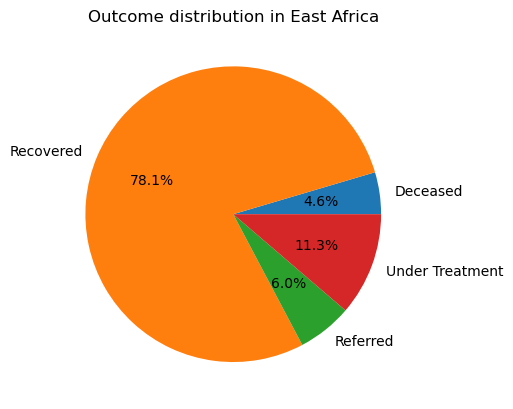

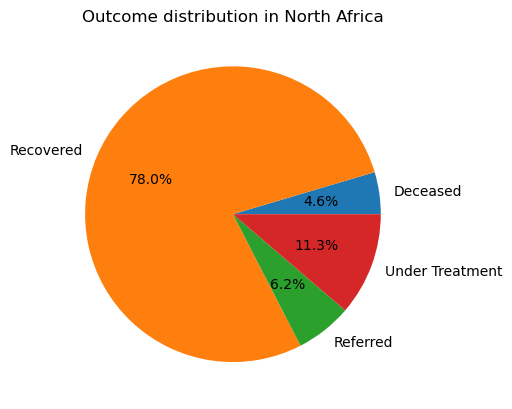

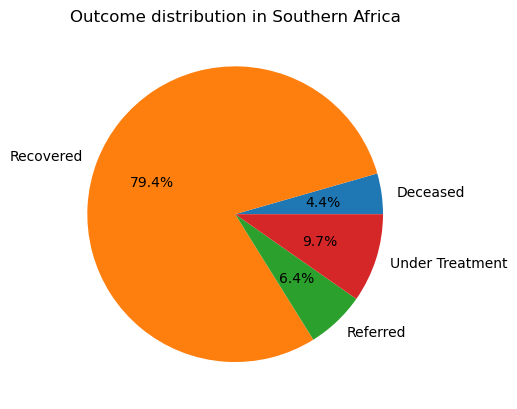

In [11]:
##define var for plot
east=region_patient_status_after_admission[region_patient_status_after_admission['Region']=='East Africa']

#plot piechart
east.set_index('Outcome')['Patient Count'].plot.pie(autopct='%1.1f%%')
plt.title("Outcome distribution in East Africa")
plt.ylabel("")
plt.show()

#define var for plot
north=region_patient_status_after_admission[region_patient_status_after_admission['Region']=='North Africa']

#plot piechart
north.set_index('Outcome')['Patient Count'].plot.pie(autopct='%1.1f%%')
plt.title("Outcome distribution in North Africa")
plt.ylabel("")
plt.show()

#define var for plot
south=region_patient_status_after_admission[region_patient_status_after_admission['Region']=='Southern Africa']

#plot piechart
south.set_index('Outcome')['Patient Count'].plot.pie(autopct='%1.1f%%')
plt.title("Outcome distribution in Southern Africa")
plt.ylabel("")
plt.show()

<h2>Findings-q3</h2>
East Africa is the highest disease burden zone.
It has the most patients across all outcomes.
Recovered dominates everywhere.
Mortality is non-trivial but still far below recovery volume.

Region rank on total patient volume:

East Africa

West Africa

North Africa

Southern Africa

<h2>Which disease has the highest recovery rate?</h2>


In [12]:
#define var
recovered_patients_per_top5_disease=health_dataset.groupby(['Disease','Outcome'])['Patient_ID'].size().sort_values(ascending=False).head(5)

#display top 5
print(recovered_patients_per_top5_disease)

Disease       Outcome  
Malaria       Recovered    2784
Hypertension  Recovered    2237
Covid-19      Recovered    2169
Typhoid       Recovered    1928
Diabetes      Recovered    1905
Name: Patient_ID, dtype: int64


In [13]:
#define var
mortality_patients_per_top5_disease=(health_dataset[health_dataset['Outcome'] == 'Deceased'].groupby('Disease')['Patient_ID']
                                      .size().sort_values(ascending=False).head(5)
)
mortality_patients_per_least5_disease=(health_dataset[health_dataset['Outcome'] == 'Deceased'].groupby('Disease')['Patient_ID']
                                      .size().sort_values(ascending=False).tail(5)
)

#display
print(f'Highest Mortality: \n {mortality_patients_per_top5_disease}')
print(f'Least Mortality: \n{mortality_patients_per_least5_disease}')

Highest Mortality: 
 Disease
Malaria         183
Covid-19        131
Hypertension    119
Diabetes        119
Tuberculosis    110
Name: Patient_ID, dtype: int64
Least Mortality: 
Disease
Diabetes        119
Tuberculosis    110
HIV/AIDS        105
Typhoid          90
Pneumonia        83
Name: Patient_ID, dtype: int64


<h2>Findings-q4</h2>
Even though Malaria was the highest disease outbreak, it still had the highest recovery rate of patient with 2784 recoveries, it still had about 183 death count
While pneumonia has the least deaths caused with only 83 deaths

<h2>What is the Mortality rate per Region?</h2>

In [14]:
#define var
region_mortality_rate=(health_dataset.groupby('Region')['Outcome'].apply(lambda x: (x=='Deceased').mean())
    .sort_values(ascending=False)
)

#display
print(region_mortality_rate)

Region
West Africa        0.051143
North Africa       0.045920
East Africa        0.045806
Southern Africa    0.044444
Name: Outcome, dtype: float64


<h2>Findings</h2>
Highest mortality rate is seen in West africa and north africa

<h1>SUMMARY</h1>
<h2>Executive Summary Insights</h2>

Disease burden in Africa is not evenly distributed. East Africa has the highest outbreak levels overall, with West and North Africa following.

Morocco (North Africa) and Ghana (West Africa) emerge as the top individual country hotspots.

Malaria is the most common disease outbreak, but also leads in recoveries, showing strong treatment response capability despite volume.

Age Group Vulnerability :The 65+ age group has the highest hospital admission rate, indicating increased vulnerability. Followed by: 36–50, 19–35 

Recovery outcomes dominate across the continent, indicating majority of patients survive treatment.

Mortality exists, but is region dependent. West Africa and North Africa show the highest mortality rate concentration even though East Africa has the highest patient volume.

Pneumonia shows the lowest death levels among diseases tracked.

<h2>Key Takeaways For Stakeholders</h2>

Regional health resource allocation should prioritize West and North Africa due to higher mortality risk, not just case volume.

East Africa needs preventive intervention due to outbreak scale, not due to high mortality.

Target Elderly Populations:

The 65+ demographic is disproportionately affected. Tailored health programs, preventive screenings, and geriatric care services are essential.

Malaria treatment programs are working. Scaling similar frameworks across lower performing disease categories could yield fast ROI.

Rate based outcome measurement (mortality %) is more actionable than raw counts for planning.

<h3>Analysis by Gbenovie Obhoo</h3>